# Basic Train/Test Experiment on the ExtraSensory data set

## Set up the Notebook

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import importlib, sys, os
sys.path.insert(0, os.path.abspath('..'))
if(importlib.util.find_spec("mFlow") is None):
    !git clone https://github.com/mlds-lab/mFlow.git
    !pip install ./mFlow
else:
    print("mFlow module found")

mFlow module found


## Import modules

In [3]:
from mFlow.Blocks.data_loader_extrasensory import extrasensory_data_loader
from mFlow.Blocks.filter import MisingLabelFilter,  MisingDataColumnFilter, Take
from mFlow.Blocks.imputer import Imputer
from mFlow.Blocks.normalizer import Normalizer
from mFlow.Blocks.experimental_protocol import ExpTrainTest
from mFlow.Blocks.results_analysis import ResultsConcat, ResultsCVSummarize, DataYieldReport

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from mFlow.Workflow.workflow import workflow
import mFlow.Workflow.compute_graph



## Define the workflow

This workflow performs a basic train/test experiment on the ExtraSensory data set sleeping prediction task. The model used is logistic regression with a fixed regularization hyper-parameter. 

The workflow includes a column filter that screens out feature dimensions that are less than 20% observed, and a missing label filter that removes instances without labels. Next, the workflow performs mean imputation followed by feature normalization. Lastly, the train/test experiment is run on the pre-processed data set and results are evaluated using four metrics (accuracy, F1, precision and recall). 

The workflow computation graph is then created and displayed, and the results are displayed. 

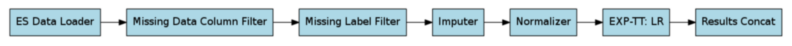

In [11]:
estimators = {"LR": LogisticRegression(C=1,solver="lbfgs",max_iter=100)}

metrics   = [accuracy_score, f1_score, precision_score, recall_score]
df_raw    = extrasensory_data_loader(label="SLEEPING")
df_cf     = MisingDataColumnFilter(df_raw, thresh=0.2)
df_lf     = MisingLabelFilter(df_cf);
df_imp    = Imputer(df_lf, method="mean")
df_norm   = Normalizer(df_imp);
results   = ExpTrainTest(df_norm, estimators, metrics=metrics);
results   = ResultsConcat(results)

flow      = workflow({"results":results})
output    = flow.run(backend="sequential", monitor=True);


In [12]:
display(output["results"]["report"])

,accuracy_score,f1_score,precision_score,recall_score
LR,0.862152,0.716387,0.835633,0.626925
